[*********************100%***********************]  1 of 1 completed
C:\Users\Ritika\AppData\Local\Temp\ipykernel_4720\1113316130.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'max' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.at[i, 'extreme_type'] = 'max' if a < 0 else 'min'


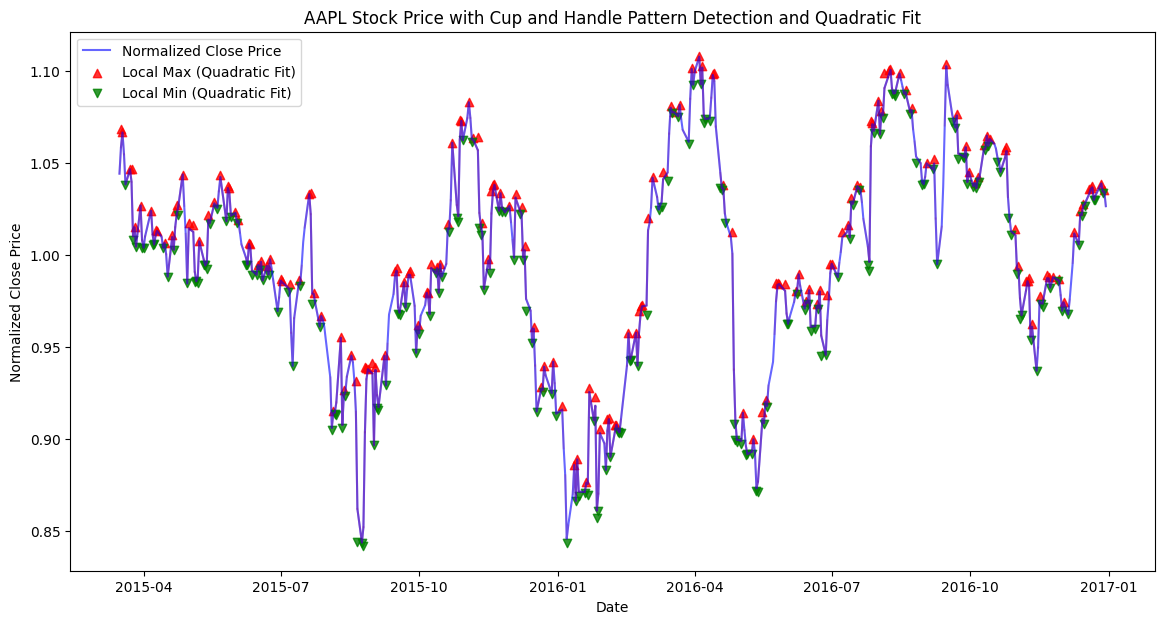

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Download stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2017-01-01')
data.reset_index(inplace=True)
data['Close'] = data['Close'].astype(float)

# Normalize by dividing Close by a 50-day rolling average
data['Normalized_Close'] = data['Close'] / data['Close'].rolling(window=50).mean()

# Parameters for fitting
window_size = 3
half_window = window_size // 2

# Initialize columns for quadratic fit results
data['quad_extreme'] = np.nan
data['extreme_type'] = np.nan

# Loop over data with sliding window for quadratic fit
for i in range(half_window, len(data) - half_window):
    # Extract windowed data on normalized close price
    window_data = data['Normalized_Close'][i - half_window:i + half_window + 1]
    x_vals = np.arange(len(window_data))
    
    # Fit a quadratic (degree 2 polynomial) to the windowed data
    coeffs = np.polyfit(x_vals, window_data, 2)
    a, b, _ = coeffs
    vertex_x = -b / (2 * a)  # Vertex of the parabola
    
    # Check if the vertex is within the window range
    if 0 <= vertex_x < len(window_data):
        vertex_y = np.polyval(coeffs, vertex_x)
        data.at[i, 'quad_extreme'] = vertex_y
        data.at[i, 'extreme_type'] = 'max' if a < 0 else 'min'

# Detect Cup and Handle patterns
cup_handle_patterns = []
for i in range(len(data) - window_size):
    if data['extreme_type'].iloc[i] == 'max' and data['extreme_type'].iloc[i + half_window] == 'min':
        left_max = data['quad_extreme'].iloc[i]
        cup_min = data['quad_extreme'].iloc[i + half_window]
        right_max = data['quad_extreme'].iloc[i + window_size - 1]
        
        if right_max >= 0.95 * left_max:  # Check cup shape
            depth = left_max - cup_min
            handle_range = data['Normalized_Close'][i + half_window + 1:i + window_size - 1]
            
            if handle_range.max() < left_max and handle_range.min() > cup_min:
                sell_price = left_max + depth
                cup_handle_patterns.append({
                    'start_date': data['Date'].iloc[i],
                    'end_date': data['Date'].iloc[i + window_size - 1],
                    'left_max': left_max,
                    'cup_min': cup_min,
                    'sell_price': sell_price
                })

# Plotting
plt.figure(figsize=(14, 7))

# Plot normalized close price
plt.plot(data['Date'], data['Normalized_Close'], label='Normalized Close Price', color='blue', alpha=0.6)

# Plot quadratic extremes
max_points = data[data['extreme_type'] == 'max']
min_points = data[data['extreme_type'] == 'min']
plt.scatter(max_points['Date'], max_points['quad_extreme'], color='red', marker='^', label='Local Max (Quadratic Fit)', alpha=0.8)
plt.scatter(min_points['Date'], min_points['quad_extreme'], color='green', marker='v', label='Local Min (Quadratic Fit)', alpha=0.8)

# Overlay quadratic fit line segments
for i in range(half_window, len(data) - half_window):
    if not np.isnan(data['quad_extreme'].iloc[i]):
        window_data = data['Normalized_Close'][i - half_window:i + half_window + 1]
        x_vals = np.arange(len(window_data))
        coeffs = np.polyfit(x_vals, window_data, 2)
        quad_fit = np.polyval(coeffs, x_vals)
        plt.plot(data['Date'][i - half_window:i + half_window + 1], quad_fit, color='purple', alpha=0.2)

# Highlight Cup and Handle patterns
for pattern in cup_handle_patterns:
    plt.axvspan(pattern['start_date'], pattern['end_date'], color='orange', alpha=0.2)
    plt.axhline(y=pattern['sell_price'], color='red', linestyle='--', label=f'Sell Target: {pattern["sell_price"]:.2f}')

# Labels and legend
plt.title(f"{ticker} Stock Price with Cup and Handle Pattern Detection and Quadratic Fit")
plt.xlabel("Date")
plt.ylabel("Normalized Close Price")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
C:\Users\Ritika\AppData\Local\Temp\ipykernel_4720\2101665830.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'max' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.at[i, 'extreme_type'] = 'max' if a < 0 else 'min'


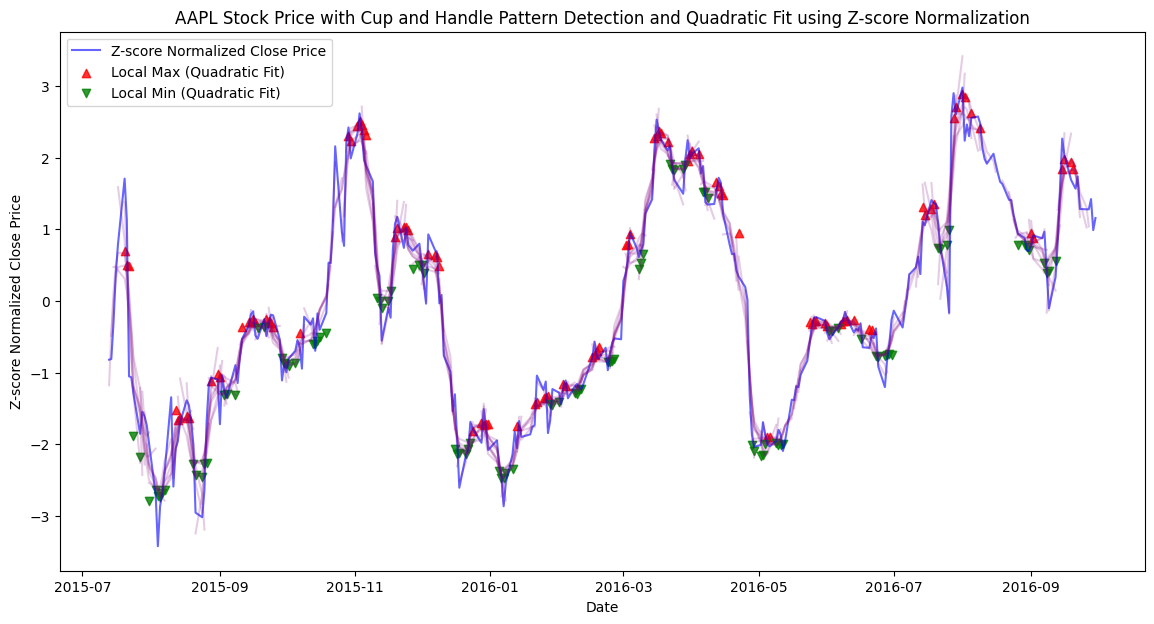

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Download stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2015-05-01', end='2016-10-01')
data.reset_index(inplace=True)
data['Close'] = data['Close'].astype(float)

# Normalize by using a Z-score with a 50-day rolling window
data['Mean_Close'] = data['Close'].rolling(window=50).mean()
data['Std_Close'] = data['Close'].rolling(window=50).std()
data['Z_Normalized_Close'] = (data['Close'] - data['Mean_Close']) / data['Std_Close']

# Parameters for fitting
window_size = 11
half_window = window_size // 2

# Initialize columns for quadratic fit results
data['quad_extreme'] = np.nan
data['extreme_type'] = np.nan

# Loop over data with sliding window for quadratic fit
for i in range(half_window, len(data) - half_window):
    # Extract windowed data on Z-score normalized close price
    window_data = data['Z_Normalized_Close'][i - half_window:i + half_window + 1]
    x_vals = np.arange(len(window_data))
    
    # Fit a quadratic (degree 2 polynomial) to the windowed data
    coeffs = np.polyfit(x_vals, window_data, 2)
    a, b, _ = coeffs
    vertex_x = -b / (2 * a)  # Vertex of the parabola
    
    # Check if the vertex is within the window range
    if 0 <= vertex_x < len(window_data):
        vertex_y = np.polyval(coeffs, vertex_x)
        data.at[i, 'quad_extreme'] = vertex_y
        data.at[i, 'extreme_type'] = 'max' if a < 0 else 'min'

# Detect Cup and Handle patterns
cup_handle_patterns = []
for i in range(len(data) - window_size):
    if data['extreme_type'].iloc[i] == 'max' and data['extreme_type'].iloc[i + half_window] == 'min':
        left_max = data['quad_extreme'].iloc[i]
        cup_min = data['quad_extreme'].iloc[i + half_window]
        right_max = data['quad_extreme'].iloc[i + window_size - 1]
        
        if right_max >= 0.95 * left_max:  # Check cup shape
            depth = left_max - cup_min
            handle_range = data['Z_Normalized_Close'][i + half_window + 1:i + window_size - 1]
            
            if handle_range.max() < left_max and handle_range.min() > cup_min:
                sell_price = left_max + depth
                cup_handle_patterns.append({
                    'start_date': data['Date'].iloc[i],
                    'end_date': data['Date'].iloc[i + window_size - 1],
                    'left_max': left_max,
                    'cup_min': cup_min,
                    'sell_price': sell_price
                })

# Plotting
plt.figure(figsize=(14, 7))

# Plot Z-score normalized close price
plt.plot(data['Date'], data['Z_Normalized_Close'], label='Z-score Normalized Close Price', color='blue', alpha=0.6)

# Plot quadratic extremes
max_points = data[data['extreme_type'] == 'max']
min_points = data[data['extreme_type'] == 'min']
plt.scatter(max_points['Date'], max_points['quad_extreme'], color='red', marker='^', label='Local Max (Quadratic Fit)', alpha=0.8)
plt.scatter(min_points['Date'], min_points['quad_extreme'], color='green', marker='v', label='Local Min (Quadratic Fit)', alpha=0.8)

# Overlay quadratic fit line segments
for i in range(half_window, len(data) - half_window):
    if not np.isnan(data['quad_extreme'].iloc[i]):
        window_data = data['Z_Normalized_Close'][i - half_window:i + half_window + 1]
        x_vals = np.arange(len(window_data))
        coeffs = np.polyfit(x_vals, window_data, 2)
        quad_fit = np.polyval(coeffs, x_vals)
        plt.plot(data['Date'][i - half_window:i + half_window + 1], quad_fit, color='purple', alpha=0.2)

# Highlight Cup and Handle patterns
for pattern in cup_handle_patterns:
    plt.axvspan(pattern['start_date'], pattern['end_date'], color='orange', alpha=0.2)
    plt.axhline(y=pattern['sell_price'], color='red', linestyle='--', label=f'Sell Target: {pattern["sell_price"]:.2f}')

# Labels and legend
plt.title(f"{ticker} Stock Price with Cup and Handle Pattern Detection and Quadratic Fit using Z-score Normalization")
plt.xlabel("Date")
plt.ylabel("Z-score Normalized Close Price")
plt.legend()
plt.show()
